# Exploratory Data Analysis  

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import scatter_matrix
import seaborn as sns
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.vector_ar.var_model import VAR


In [211]:
pathA = '/Users/Welliareetil/Documents/Cabestan-technical challenge/WelliaveetilDataset/A.csv'
pathB = '/Users/Welliareetil/Documents/Cabestan-technical challenge/WelliaveetilDataset/B.csv'
pathC = '/Users/Welliareetil/Documents/Cabestan-technical challenge/WelliaveetilDataset/C.csv'
pathD = '/Users/Welliareetil/Documents/Cabestan-technical challenge/WelliaveetilDataset/D.csv'

In [212]:
A = pd.read_csv(pathA)
B = pd.read_csv(pathB)
C = pd.read_csv(pathC)
D = pd.read_csv(pathD)

In [213]:
A.columns = ["date",'op_A', 'hi_A', 'lo_A', 'se_A', 'volume_A', 'oi_A']
B.columns = ["date",'op_B', 'hi_B', 'lo_B', 'se_B', 'volume_B', 'oi_B']
C.columns = ["date",'op_C', 'hi_C', 'lo_C', 'se_C', 'volume_C', 'oi_C']
D.columns = ["date",'op_D', 'hi_D', 'lo_D', 'se_D', 'volume_D', 'oi_D']

In [214]:
A["date"] = pd.to_datetime(A["date"])
B["date"] = pd.to_datetime(B["date"])
C["date"] = pd.to_datetime(C["date"])
D["date"] = pd.to_datetime(D["date"])

In [215]:
#We make note of the start and end dates of the 4 time series. This will be useful when making plot comparisons. 

a_start = A['date'][0]
a_end = A['date'][len(A['date'])-1]
b_start = B['date'][0]
b_end = B['date'][len(B["date"])-1]
c_start = C['date'][0]
c_end = C['date'][6823]
d_start = D['date'][0]
d_end = D['date'][10025]

In [216]:
A.index = A["date"]
#del(A['date'])
B.index = B["date"]
#del(B['date'])
C.index = C['date']
#del(C['date'])
D.index = D['date']
#del(D['date'])


# Missing Values and dates

Checking for missing values and any unusual behaviour. 

In [217]:
null_list = []
null_list.append(list(A.isnull().sum()))
null_list.append(list(B.isnull().sum()))
null_list.append(list(C.isnull().sum()))
null_list.append(list(D.isnull().sum()))
null_list

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 6, 6, 6, 0, 8, 11]]

We see that the series D has some missing values. 

We check if the data has certain dates missing. We do so by counting 
the number of days between the start and end dates of 
the different series and then multiplying this by (251/365) since 251 is a rough estimate of the number of
working days per year. We then subtract the length of the various series which we assume
counts the actual working days 
of the year and then normalize the error by dividing by the number of days between the start and end date. We see that 
this error rate is pretty much constant over all series.

In [218]:
def missing_days(A):
    a_start = A['date'][0]
    a_end = A['date'][len(A['date'])-1]
    deltaA = a_end - a_start
    e1 = deltaA.days*(251/365) - len(A)
    print(e1/deltaA.days)

In [219]:
missing_days(A)

-0.0011681770871062522


In [220]:
missing_days(B)

-0.001960050319346523


In [221]:
missing_days(C)

-0.0012737444074875828


In [222]:
missing_days(D)

-0.002301927951861117


# Relationship between the opening prices of the 4 assets

In [223]:
a = max(a_start,b_start,c_start,d_start)
b = min(a_end,b_end,c_end,d_end)

In [224]:
b = '2017/08/29'
a = "1990/07/17"

In [225]:
#A.set_index("date")
#B.set_index("date")
#C.set_index('date')
#D.set_index('date')
#a_start = A['date'][0]
#a_end = A['date'][len(A['date'])-1]
#b_start = B['date'][0]
#b_end = B['date'][len(B["date"])-1]
#c_start = C['date'][0]
#c_end = C['date'][6823]
#d_start = D['date'][0]
#d_end = D['date'][10025]

In [226]:
a = max(a_start,b_start,c_start,d_start)
b = min(a_end,b_end,c_end,d_end)

A comparison plot of the opening prices of A,B,C and D during the relevant time periods. 

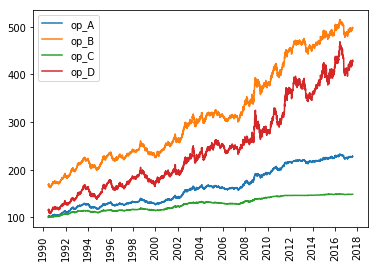

In [227]:
fig,ax = plt.subplots()
ax.plot(A["date"][a:b],A[a:b]['op_A'])
ax.plot(B["date"][a:b],B[a:b]['op_B'])
ax.plot(C["date"],C['op_C'])
ax.plot(D["date"][3135:9964],D[3135:9964]['op_D'])
ax.xaxis.set_major_locator(mdates.YearLocator(2,month = 2,day = 2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.legend()
_=plt.xticks(rotation=90) 
plt.show()

We observe a very strong relationship between the series op_B and op_D. To be sure we calculate correlations between the returns (or in this case day to day changes) between the series. 

In [228]:
A_ret = A.copy()
del(A_ret['date'])
A_ret = A_ret.pct_change()
A_ret = A_ret.dropna(axis = 0)

B_ret = B.copy()
del(B_ret['date'])
B_ret = B_ret.pct_change()
B_ret = B_ret.dropna(axis = 0)

C_ret = C.copy()
del(C_ret['date'])
C_ret = C_ret.pct_change()
C_ret = C_ret.dropna(axis = 0)

D_ret = D.copy()
del(D_ret['date'])
D_ret = D_ret.pct_change()
D_ret = D_ret.dropna(axis = 0)


We create a database that includes all the data from the 4 series A,B,C and D. We study the correlations between series. 

In [229]:
returns = A_ret.join(B_ret,how = 'inner')
returns = returns.join(C_ret,how = "inner")
returns = returns.join(D_ret,how = 'inner')

In [230]:
l = []
for j in list(returns.columns):
    j = j + '_ret'    
    l.append(j)
returns.columns = l    

In [231]:
returns.columns

Index(['op_A_ret', 'hi_A_ret', 'lo_A_ret', 'se_A_ret', 'volume_A_ret',
       'oi_A_ret', 'op_B_ret', 'hi_B_ret', 'lo_B_ret', 'se_B_ret',
       'volume_B_ret', 'oi_B_ret', 'op_C_ret', 'hi_C_ret', 'lo_C_ret',
       'se_C_ret', 'volume_C_ret', 'oi_C_ret', 'op_D_ret', 'hi_D_ret',
       'lo_D_ret', 'se_D_ret', 'volume_D_ret', 'oi_D_ret'],
      dtype='object')

In [232]:
correlations_op = returns[['op_A_ret','op_B_ret','op_C_ret','op_D_ret']].corr()
print(correlations_op)

          op_A_ret  op_B_ret  op_C_ret  op_D_ret
op_A_ret  1.000000  0.946660  0.822254  0.850212
op_B_ret  0.946660  1.000000  0.755044  0.929759
op_C_ret  0.822254  0.755044  1.000000  0.644406
op_D_ret  0.850212  0.929759  0.644406  1.000000


In [233]:
#scatter_matrix(returns[['op_A_ret','op_B_ret','op_C_ret','op_D_ret']])
#plt.show()

In [234]:
dims = (12,7.5)
#fig,ax = plt.subplots(figsize = dims)
correlations = returns.corr()
#sns.heatmap(ax = ax, data = correlations)
#plt.show()
#plt.savefig('correlation_matrix.png')

We make the following observations : 

1) The volume changes and changes in open interest from day to day show little correlation with the day to day changes of the other features (hi_ret,lo_ret,se_ret,op_ret) within the same series and
the other series.

2) For any two series, say A and B, we have strong correlations between op_A_ret and op_B_ret, hi_A_ret and hi_B_ret,
lo_A_ret and lo_B_ret, se_A_ret and se_B_ret. 

# Behaviour within each series. 



# We predict the opening prices of asset A.

We start by plotting the autocorrelation function for the returns series - A_ret

In [235]:
A_ret.describe()

,op_A,hi_A,lo_A,se_A,volume_A,oi_A
count,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000,7424.000000
mean,0.000113,0.000112,0.000112,0.000113,inf,0.007048
std,0.002599,0.002468,0.002384,0.002519,NaN,0.391750
min,-0.017423,-0.016938,-0.017679,-0.019006,-1.000000,-0.971345
25%,-0.001341,-0.001113,-0.001092,-0.001258,-0.231081,-0.009309
50%,0.000141,0.000063,0.000145,0.000128,0.003154,0.001121
75%,0.001581,0.001365,0.001363,0.001528,0.309740,0.013350
max,0.018204,0.019126,0.015206,0.019735,inf,33.385878


In [236]:
#Rename the columns so that they differ from those of A

def add_ret(B):
    t = []
    for j in list(B.columns):
        j = j + '_ret'    
        t.append(j)
    B.columns = t

In [237]:
add_ret(A_ret)

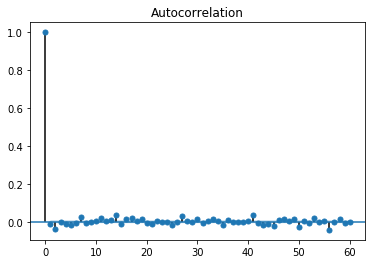

In [238]:
plot_acf(A_ret['op_A_ret'],lags = 60,alpha = 0.5)

It looks like the series is a white noise process because we do not see any non trivial auto correlations beyond lag 0. 

We make test quickly if this observation is accurate using the Dicky-Fuller test on the series A_ret. 

In [239]:
def ad_fuller_test(S):
    results = adfuller(S)
    print("The p-value is " + str(results[1]))

In [240]:
ad_fuller_test(A['op_A'])

The p-value is 0.951838970132


The test implies that A is a random walk. 

We fit ARIMA(p,d,q) models to predict the opening price of the asset A given its previous opening prices. 

We begin by finding the most suitable p,d and q using the AIC and BIC scores. 

In [241]:
def ARIMA_fitting_AIC_BIC_list(A):
    X = A.values
    size = int(len(X)*0.70)
    train = X[0:size]
    test = X[size:len(X)]
    AIC = []
    BIC = []
    for i in range(1,6):
        model = ARIMA(train,order = (i,1,0))
        model_fit = model.fit(disp=0)
        AIC.append(model_fit.aic)
        BIC.append(model_fit.bic)
    print('The AIC list is ' )
    print(AIC)
    print('The BIC list is ')
    print(BIC)

In [242]:
ARIMA_fitting_AIC_BIC_list(A['op_A'])

The AIC list is 
[4965.8695887474005, 4959.7325046502265, 4961.611741343775, 4954.573219950087, 4956.439966941089]
The BIC list is 
[4985.5365218807719, 4985.9550821613884, 4994.3899632327275, 4993.9070862168301, 5002.329477585622]


The AIC and BIC scores tell us that a ARIMA(2,1,0) is a reasonable choice to make. We compute the MSE of the ARIMA(2,1,0) model as follows and find that on average the model has an error of 0.2024 using a Rolling forecast. 

Rolling forecast error calculation :

In [109]:
def ARIMA_rolling_forecast(A,p,d,q):
    X = A.values
    size = int(len(X)*0.70)
    train = X[0:size]
    test = X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(p,d,q))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return(test, predictions)    

In [79]:
testA,predictions_A210 = ARIMA_rolling_forecast(A['op_A'],2,1,0)

/Users/Welliareetil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


We see in the graph below that the predictions follow the test data almost perfectly. 

In [82]:
def plot_predictions(test,predictions):
    plt.plot(predictions)
    plt.plot(test)
    plt.xlabel('Index of data point of test set')
    plt.ylabel('price')
    plt.legend()
    plt.show()

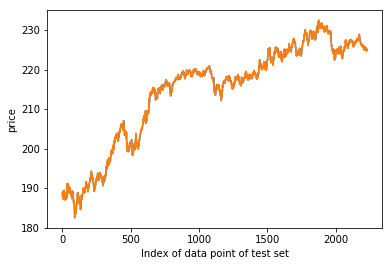

In [84]:
plot_predictions(testA,predictions_A210)

In [88]:
def MSE(test,predictions):
    error = mean_squared_error(test,predictions)
    print(error)

In [89]:
MSE(testA,predictions_A210)

0.202465936397


We calculate the mean absolute scaled error so as to be able to compare the models for the different series. 

In [90]:
def MASE(test,predictions):
    err = [test[j] - predictions[j] for j in range(len(test))]
    #Naive error calculation : 
    T = len(test)
    naive_error = 0
    for j in range(1,T):
        naive_error = naive_error + abs(test[j] - test[j-1])
    naive_error = (1/(T-1))*naive_error 
    scaled_errors = [x*naive_error for x in err]
    MASE = np.mean([abs(x) for x in scaled_errors])
    print("The mean absolute scaled error is " + str(MASE))

In [91]:
MASE(testA,predictions_A210)

The mean absolute scaled error is 0.11543538808


We also test an ARIMA(5,1,0) model.

In [91]:
testA,predictions_A510 = ARIMA_rolling_forecast(A,5,1,0)  

/Users/Welliareetil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [109]:
errorA510 = mean_squared_error(test,predictions_A510)
print(errorA510)

0.202871129821


In [175]:
MASE(testA,predictions_A510)

The mean absolute scaled error is 0.115516955127


# We predict the opening price of asset B

In [243]:
B_ret.describe()

,op_B,hi_B,lo_B,se_B,volume_B,oi_B
count,8958.000000,8958.000000,8958.000000,8958.000000,8958.000000,8958.000000
mean,0.000189,0.000186,0.000187,0.000187,inf,0.019977
std,0.004552,0.004039,0.003997,0.004231,NaN,1.625740
min,-0.030137,-0.022499,-0.025499,-0.024001,-1.000000,-0.992675
25%,-0.002288,-0.001830,-0.001829,-0.002102,-0.225121,-0.010839
50%,0.000126,0.000118,0.000276,0.000150,0.004992,0.001436
75%,0.002669,0.002216,0.002229,0.002512,0.304181,0.014948
max,0.044639,0.035004,0.042678,0.036305,inf,153.604520


In [244]:
add_ret(B_ret)

We plot the ACF for the returns series of B which is stationary. 

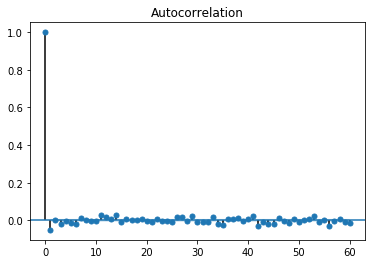

In [245]:
plot_acf(B_ret['op_B_ret'],lags = 60,alpha = 0.5)

In [246]:
ad_fuller_test(B['op_B'])

The p-value is 0.962276722921


It is extremely likely that B is a random walk.

In [247]:
ARIMA_fitting_AIC_BIC_list(B['op_B'])

The AIC list is 
[16817.450667461133, 16819.09833432123, 16815.14876275715, 16816.694838732066, 16817.80542731725]
The BIC list is 
[16837.681262362014, 16846.072460855736, 16848.866420925286, 16857.156028533827, 16865.010148752637]


Selection in this case is slightly more difficult. We choose the ARIMA(1,1,0) model. We will also test the ARIMA(4,1,0) model and the ARIMA(2,1,0) model. 

In [111]:
testB,predictions_B110 = ARIMA_rolling_forecast(B['op_B'],1,1,0)

/Users/Welliareetil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Welliareetil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Welliareetil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Welliareetil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


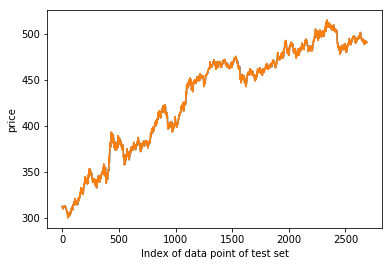

In [115]:
plot_predictions(testB,predictions_B110)

In [118]:
errorB110 = mean_squared_error(testB,predictions_B110)
print(errorB110)

2.68475472242


In [119]:
MASE(testB,predictions_B110)

The mean absolute scaled error is 1.54736444962


We see that the mean absolute scaled error in this case indicates that the model performs WORSE than 
a model which predicts tomorrows opening price as todays price. To be sure we employ an ARIMA(2,1,0) model as well. 

In [ ]:
testB,predictions_B210 = ARIMA_rolling_forecast(B['op_B'],2,1,0)

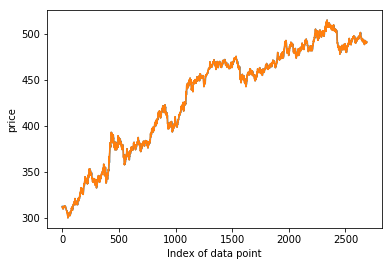

In [194]:
plot_predictions(testB,predictions_B210)

 We calculate the MSE below.

In [195]:
errorB210 = mean_squared_error(testB,predictionsB210)
print(errorB210)

2.6833382522


In [197]:
MASE(testB,predictionsB210)

The mean absolute scaled error is 1.54680780562


# VAR models for asset B

To reduce the scaled error, we look to fit VAR models for the asset B. 

In [248]:
#function to plot the cross correlation for stationary series X and Y.
def CCF(X,Y,s1):
    cross_corr = ccf(X,Y)
    plt.plot(cross_corr[0:250])
    plt.xlabel(s1)
    plt.show()

In [249]:
#CCF(B_ret['op_B_ret'],B_ret['hi_B_ret'],'op_B_ret vs hi_B_ret')
#CCF(B_ret['op_B_ret'],B_ret['lo_B_ret'],'op_B_ret vs lo_B_ret')

Looking at the summary statistics above, we see that the feature volume_B_ret has some issues.

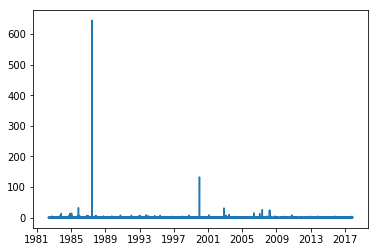

In [298]:
plt.plot(B_ret['volume_B_ret'])      
plt.show()

We observe certain anomalies in the volume data and try to identify the precise points at which these anomalies occurred. 

In [251]:
s = []
for j in range(len(B_ret)):
    if B_ret['volume_B_ret'][j] > 50:
        s.append(j)
print(s) 
strange_dates_B = []
for j in s:
    strange_dates_B.append(B['date'][j])

[798, 1285, 3319, 4157, 4454, 4828]


There are two days which had significant volume changes - 05/06/1985 - 645%, 28/06/2001 - 132%. We consider these extreme outliers and hence alter the information here by replace the values with the mean of the volume changes of the days before and after. 

In [252]:
def insert_mean(S,i):
    S[i] = (S[i-1]+S[i+1])/2

In [253]:
B_clean = B.copy()

In [254]:
for j in s:
    insert_mean(B_clean['volume_B'],j)

/Users/Welliareetil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [255]:
B_clean_ret = B_clean.copy()
del(B_clean_ret['date'])
B_clean_ret = B_clean_ret.pct_change()
B_clean_ret = B_clean_ret.dropna()
B_clean_ret.describe()

,op_B,hi_B,lo_B,se_B,volume_B,oi_B
count,8958.000000,8958.000000,8958.000000,8958.000000,8958.000000,8958.000000
mean,0.000189,0.000186,0.000187,0.000187,0.144357,0.019977
std,0.004552,0.004039,0.003997,0.004231,0.985588,1.625740
min,-0.030137,-0.022499,-0.025499,-0.024001,-0.995715,-0.992675
25%,-0.002288,-0.001830,-0.001829,-0.002102,-0.224541,-0.010839
50%,0.000126,0.000118,0.000276,0.000150,0.005415,0.001436
75%,0.002669,0.002216,0.002229,0.002512,0.303111,0.014948
max,0.044639,0.035004,0.042678,0.036305,32.110540,153.604520


In [256]:
#rename the columns of B_clean_ret
add_ret(B_clean_ret)

In [257]:
B_clean_ret.head()

,op_B_ret,hi_B_ret,lo_B_ret,se_B_ret,volume_B_ret,oi_B_ret
date,,,,,,
1982-05-05,0.011853,0.004344,0.009670,0.001741,0.233079,0.181867
1982-05-06,0.006941,0.010381,0.009142,0.014335,-0.332529,-0.126201
1982-05-07,0.009910,0.004281,0.005608,0.003854,-0.305745,0.003491
1982-05-10,-0.002560,0.000426,0.001716,-0.001706,-0.351364,-0.003479
1982-05-11,-0.002139,0.000426,-0.001713,0.001709,0.261280,-0.050703


We define a new column of closing prices.

In [290]:
def closing_price_column(df,op,s):
    l = pd.Series([df[op][j+1] for j in range(len(df)-1)] + [0])
    df = df.assign(cl = l.values)
    df = df.drop(df.index[-1])
    df.rename(columns = {'cl':s},inplace = True)
    return(df)

In [293]:
B_clean_ret = closing_price_column(B_clean_ret,'op_B_ret','cl_B_ret')

In [295]:
B = closing_price_column(B,'op_B','cl_B')

We begin by selecting a suitable model for prediction. We do so by selecting according to the BIC score. 

In [200]:
def selecting_model(df,l):
    size = int(len(df)*0.7)
    data = df[l][0:size]
    model = VAR(data)
    return(model.select_order(20))

In [201]:
selecting_model(B_clean_ret,['cl_B_ret','hi_B_ret', 'lo_B_ret', 'se_B_ret', 'volume_B_ret', 'oi_B_ret'])

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -44.54       -44.53    4.554e-20       -44.53
1        -46.55       -46.51    6.065e-21       -46.54
2        -46.98       -46.90    3.933e-21       -46.96
3        -47.21       -47.09    3.145e-21       -47.17
4        -47.33       -47.16    2.796e-21       -47.27
5        -47.41       -47.21    2.562e-21       -47.34
6        -47.48       -47.24    2.387e-21       -47.40
7        -47.53       -47.25    2.278e-21       -47.43
8        -47.57      -47.25*    2.188e-21       -47.46
9        -47.60       -47.24    2.132e-21       -47.47
10       -47.62       -47.22    2.091e-21       -47.48
11       -47.63       -47.20    2.062e-21       -47.48
12       -47.64       -47.17    2.036e-21       -47.48
13       -47.66       -47.15    1.997e-21      -47.49*
14       -47.67       -47.12    1.974e-21       -47.48
15       -

{'aic': 18, 'bic': 8, 'fpe': 18, 'hqic': 13}

We now write a function that tests the model using a rolling forecast for the given data. 

** Make sure the date columns has already been removed.

** Make sure the first element of the list l is the column 'cl_B_ret'

In [194]:
def VAR_rolling_forecast(df,l,p):
    size = int(len(df)*0.70)
    predictions = list()
    test = []
    while size <= len(df)-1:
        data = df[0:size][l]
        model = VAR(data)
        model_fit = model.fit(p)
        output = model_fit.forecast(data.values,1)
        yhat = output[0][0]
        predictions.append(yhat)
        test.append(df[l[0]][size])
        size = size + 1
    return(test,predictions)    

In [195]:
l = ['cl_B_ret','hi_B_ret', 'lo_B_ret', 'se_B_ret', 'volume_B_ret', 'oi_B_ret']
testB, predictions_BVAR8 = VAR_rolling_forecast(B_clean_ret,l,8)

In [196]:
MASE(testB,predictions_BVAR8)

The mean absolute scaled error is 1.29451065465e-05


We observe a massive improvement in MASE

In [197]:
mean_squared_error(testB,predictions_BVAR8)

1.6075044568510779e-05

Recover the predictions for the closing price of asset B

In [313]:
def recover_asset_B_predictions(S,size,test,predictions):
    test_adj = []
    for j in range(size+1,len(S)):
        test_adj.append(S[j])
    predictions_adj = []
    j = size
    t = 0
    while t <= len(predictions)-1 and j <= len(S)-1:
        predictions_adj.append(S[j] + predictions[t])
        t = t + 1
        j = j + 1
    return(test_adj,predictions_adj)    

In [314]:
size = int(len(B_clean_ret)*0.70)
testB_adj,predictions_BVAR8_adj = recover_asset_B_predictions(B['cl_B'],size,testB,predictions_BVAR8)

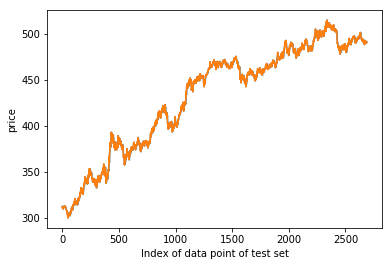

In [319]:
plot_predictions(testB_adj,predictions_BVAR8_adj)

# We predict the opening price of asset C

In [203]:
C_ret.describe()

,op_C,hi_C,lo_C,se_C,volume_C,oi_C
count,6823.000000,6823.000000,6823.000000,6823.000000,6823.000000,6823.000000
mean,0.000059,0.000058,0.000058,0.000058,0.274277,0.002156
std,0.001083,0.001025,0.000985,0.001021,1.520897,0.051841
min,-0.007143,-0.007571,-0.009263,-0.009231,-0.984305,-0.315962
25%,-0.000461,-0.000383,-0.000385,-0.000430,-0.290382,-0.009701
50%,0.000000,0.000000,0.000000,0.000000,-0.000913,0.001620
75%,0.000587,0.000478,0.000502,0.000546,0.406816,0.014492
max,0.007069,0.009767,0.007599,0.008664,56.071429,0.489942


In [204]:
t = []
for j in list(C_ret.columns):
    j = j + '_ret'    
    t.append(j)
C_ret.columns = t

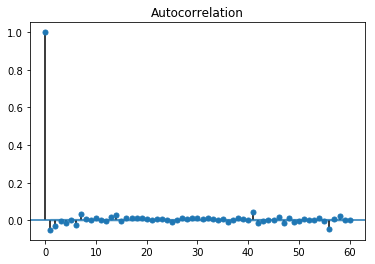

In [205]:
plot_acf(C_ret['op_C_ret'],lags = 60,alpha = 0.5)

In [206]:
RW_test_C = adfuller(C['op_C'])
print("The p-value is "+ str(RW_test_C[1]))

The p-value is 0.495958017084


We see that the p-value indicates that there is a high chance that C is a random walk. 

In [207]:
XC = C['op_C'].values
size = int(len(XC)*0.70)
trainC = XC[0:size]
testC = XC[size:len(XC)]

In [208]:
AIC = []
BIC = []
for i in range(1,6):
    model = ARIMA(trainC,order = (i,1,0))
    model_fit = model.fit(disp=0)
    AIC.append(model_fit.aic)
    BIC.append(model_fit.bic)

In [209]:
AIC

[-4503.827592841331,
 -4507.7979488948695,
 -4506.2245057312175,
 -4507.27249312184,
 -4505.339098590113]

In [210]:
BIC

[-4484.4141450825873,
 -4481.9133518832105,
 -4473.8687594666435,
 -4468.445597604351,
 -4460.0410538197093]

In [211]:
historyC210 = [x for x in trainC]
predictionsC210 = list()
for t in range(len(testC)):
    model = ARIMA(historyC210, order=(2,1,0))
    model_fit = model.fit(disp=0)
    outputC210 = model_fit.forecast()
    yhatC210 = outputC210[0]
    predictionsC210.append(yhatC210)
    obs = testC[t]
    historyC210.append(obs)

/Users/Welliareetil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


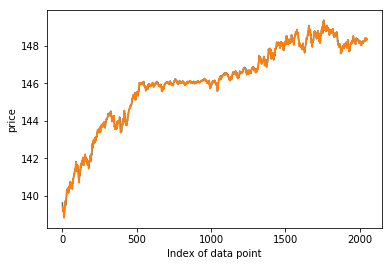

In [213]:
plt.plot(predictionsC210)
plt.plot(testC)
plt.xlabel('Index of data point')
plt.ylabel('price')
plt.legend()
plt.show()

In [214]:
errorC210 = mean_squared_error(testC,predictionsC210)
print(errorC210)

0.00655947738868


In [215]:
MASE(testC,predictionsC210)

The mean absolute scaled error is 0.00338072206061


# We predict the opening price of asset D

In [40]:
D_ret.describe()

,op_D,hi_D,lo_D,se_D,volume_D,oi_D
count,10007.000000,10007.000000,10007.000000,10007.000000,1.000700e+04,1.000700e+04
mean,0.000172,0.000166,0.000165,0.000168,inf,inf
std,0.007565,0.006480,0.006483,0.007043,NaN,NaN
min,-0.059296,-0.047258,-0.040884,-0.032905,-1.000000e+00,-1.000000e+00
25%,-0.003912,-0.003042,-0.003029,-0.003647,-2.217417e-01,-1.245724e-02
50%,0.000277,0.000000,0.000277,0.000275,3.959469e-03,8.900068e-04
75%,0.004265,0.003431,0.003435,0.004084,2.982340e-01,1.603788e-02
max,0.059129,0.053608,0.049610,0.040624,inf,inf


In [41]:
t = []
for j in list(D_ret.columns):
    j = j + '_ret'    
    t.append(j)
D_ret.columns = t

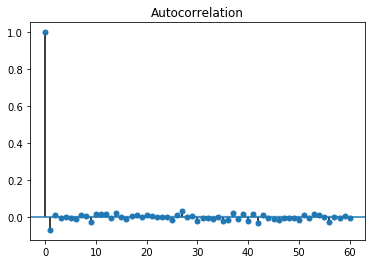

In [42]:
plot_acf(D_ret['op_D_ret'],lags = 60,alpha = 0.5)

We check for missing values.

In [67]:
nl = []
A = D['op_D'].isnull()
for j in range(len(A)):
    if A[j] == True:
        nl.append(j)
print(nl)        

[5960, 5985, 6235, 6466, 6716, 6739]


In [72]:
D.iloc[6235,:]

date        2002-11-11 00:00:00
op_D                        NaN
hi_D                        NaN
lo_D                        NaN
se_D                    222.828
volume_D                    NaN
oi_D                     410283
Name: 2002-11-11 00:00:00, dtype: object

In [75]:
D = D.dropna()
D['op_D'].isnull().sum()

0

In [76]:
RW_test_D = adfuller(D['op_D'])
print("The p-value is "+ str(RW_test_D[1]))

The p-value is 0.992045645068


In [77]:
XD = D['op_D'].values
sizeD = int(len(XD)*0.70)
trainD = XD[0:sizeD]
testD = XD[sizeD:len(XD)]

In [78]:
AIC = []
BIC = []
for i in range(1,6):
    model = ARIMA(trainD,order = (i,1,0))
    model_fit = model.fit(disp=0)
    AIC.append(model_fit.aic)
    BIC.append(model_fit.bic)

In [79]:
AIC

[19564.68526088849,
 19566.31932842902,
 19567.007057011597,
 19568.342908020506,
 19570.340105660718]

In [80]:
BIC

[19585.247970968707,
 19593.736275202646,
 19601.278240478627,
 19609.468328180941,
 19618.319762514559]

In [82]:
historyD110 = [x for x in trainD]
predictionsD110 = list()
for t in range(len(testD)):
    model = ARIMA(historyD110, order=(1,1,0))
    model_fit = model.fit(disp=0)
    outputD110 = model_fit.forecast()
    yhatD110 = outputD110[0]
    predictionsD110.append(yhatD110)
    obs = testD[t]
    historyD110.append(obs)

/Users/Welliareetil/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


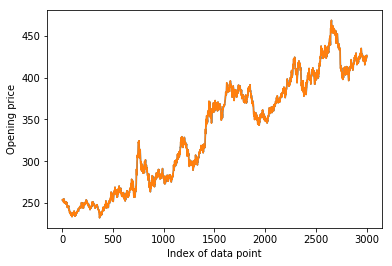

In [85]:
plt.plot(predictionsD110)
plt.plot(testD)
plt.ylabel("Opening price")
plt.xlabel("Index of data point")
plt.show()

In [83]:
errorD110 = mean_squared_error(testD,predictionsD110)
print(errorD110)

4.98851514808


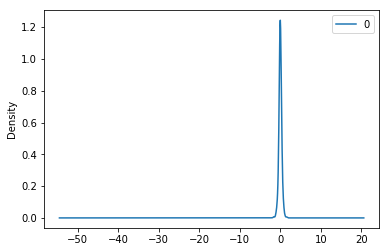

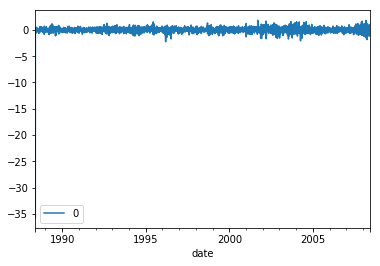

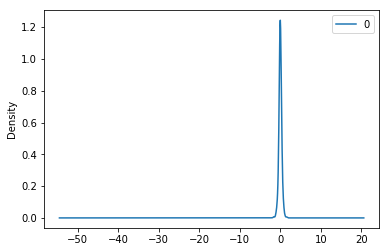

                 0
count  5032.000000
mean      0.007181
std       0.625121
min     -35.757758
25%      -0.188324
50%       0.014715
75%       0.216662
max       1.839142


In [245]:
residuals = pd.DataFrame(mod.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [231]:
y_pred = mod.forecast(steps = 100)
y_pred[0]

array([ 172.27862327,  172.27638631,  172.27414949,  172.2719128 ,
        172.26967626,  172.26743984,  172.26520357,  172.26296743,
        172.26073143,  172.25849557,  172.25625985,  172.25402426,
        172.25178881,  172.24955349,  172.24731832,  172.24508328,
        172.24284838,  172.24061361,  172.23837898,  172.23614449,
        172.23391014,  172.23167592,  172.22944184,  172.2272079 ,
        172.22497409,  172.22274042,  172.22050689,  172.21827349,
        172.21604024,  172.21380711,  172.21157413,  172.20934128,
        172.20710857,  172.204876  ,  172.20264356,  172.20041126,
        172.1981791 ,  172.19594707,  172.19371519,  172.19148343,
        172.18925182,  172.18702034,  172.184789  ,  172.18255779,
        172.18032673,  172.1780958 ,  172.175865  ,  172.17363434,
        172.17140382,  172.16917344,  172.16694319,  172.16471308,
        172.16248311,  172.16025327,  172.15802358,  172.15579401,
        172.15356459,  172.1513353 ,  172.14910614,  172.14687

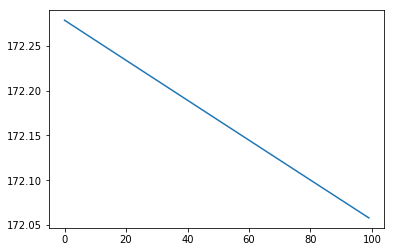

In [234]:
plt.plot(y_pred[0])
plt.show()

In [96]:
W = set(C[a:b]['date'])
X = set(A[a:b]['date'])
Y = set(B[a:b]['date'])
Z = set(D[a:b]['date'])
print(Z-X)

{Timestamp('2002-11-11 00:00:00'), Timestamp('2001-10-08 00:00:00'), Timestamp('2003-10-13 00:00:00'), Timestamp('2004-10-11 00:00:00'), Timestamp('2004-11-11 00:00:00'), Timestamp('2001-11-12 00:00:00'), Timestamp('2004-06-11 00:00:00'), Timestamp('2016-03-12 00:00:00')}


In [45]:
B.describe()

,op,hi,lo,se,volume,oi
count,7425.000000,7425.000000,7425.000000,7425.000000,7.425000e+03,7.425000e+03
mean,159.017703,159.307618,158.737085,159.030714,4.854855e+05,8.601089e+05
std,41.440075,41.498492,41.385500,41.444247,5.458971e+05,8.073351e+05
min,97.355160,97.534032,97.094983,97.257594,0.000000e+00,1.353000e+03
25%,126.839331,127.046677,126.629281,126.823692,4.061125e+04,1.627780e+05
50%,157.667535,158.020276,157.235378,157.693791,2.459887e+05,6.480260e+05
75%,199.267378,199.579388,198.961211,199.280699,8.286133e+05,1.372178e+06
max,232.475483,233.261424,232.149244,232.490311,4.831224e+06,3.230707e+06


'D'